# DBSCAN Clustering

`It mainly deal with non-linear dataset`

``It's also use for outlier``

DBSCAN is a density-based clustering algorithm that groups data points that are closely packed together and marks outliers as noise based on their density in the feature space.
- **Arbitrary-Shaped Clusters:** Clusters can take any shape, not just circular or convex.
- **Noise and Outliers:** It effectively identifies and handles noise points without assigning them to any cluster.

![DBSCAN](https://media.geeksforgeeks.org/wp-content/uploads/20250129131304142658/Databases.webp)

## Silhouette Score in Clustering

The **Silhouette Score** is a metric used to evaluate the quality of clusters created by a clustering algorithm. It measures how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The score ranges from **-1** to **1**, where:

- **1** indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.
- **0** indicates that the object is on or very close to the decision boundary between two neighboring clusters.
- **-1** indicates that the object might have been assigned to the wrong cluster.

The Silhouette Score is calculated using the mean intra-cluster distance (*a*) and the mean nearest-cluster distance (*b*) for each sample. The formula is:

$$ \text{Silhouette Score} = \frac{b - a}{\max(a, b)} $$

### Example: Calculating the Silhouette Score in Python

Here’s an example of how to calculate the Silhouette Score using Python and the `sklearn` library:

```python
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np

# Example data
X = np.array([[1, 2], [2, 2], [2, 3], [8, 7], [8, 8], [25, 80]])

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=3, min_samples=2)
labels = dbscan.fit_predict(X)

# Calculate Silhouette Score
score = silhouette_score(X, labels)
print(f'Silhouette Score: {score}')
```

### Explanation
- We create a dataset `X`.
- We apply the **DBSCAN** clustering algorithm.
- We calculate the **Silhouette Score** to evaluate the clustering quality.

This score helps in understanding how well the clusters are formed and can guide in tuning the parameters of the clustering algorithm.


# Practical

In [302]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

In [303]:
x,y = make_moons(n_samples=250,noise=0.04)

In [304]:
df = {"data1":x[:,0] , "data2":x[:,1]}

In [305]:
dataset = pd.DataFrame(df)
dataset.head()

,data1,data2
0,-0.016437,0.616003
1,1.810040,-0.214087
2,1.955865,0.149356
3,0.864547,0.509410
4,-0.272865,0.945975


<Axes: xlabel='data1', ylabel='data2'>

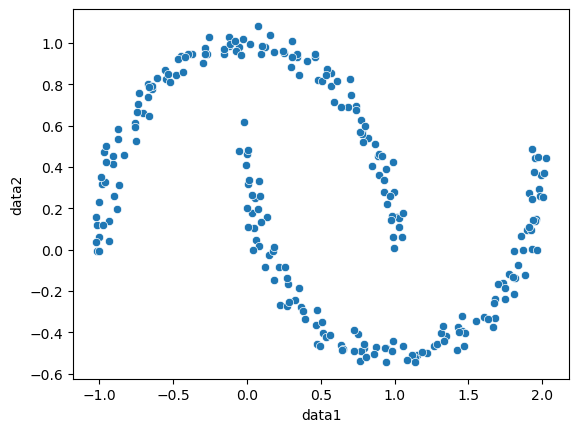

In [306]:
sns.scatterplot(x="data1",y="data2",data=dataset)

In [307]:
from sklearn.cluster import DBSCAN
dbs_can = DBSCAN(eps=0.2, min_samples=5)
dataset["predict"]=dbs_can.fit_predict(dataset)

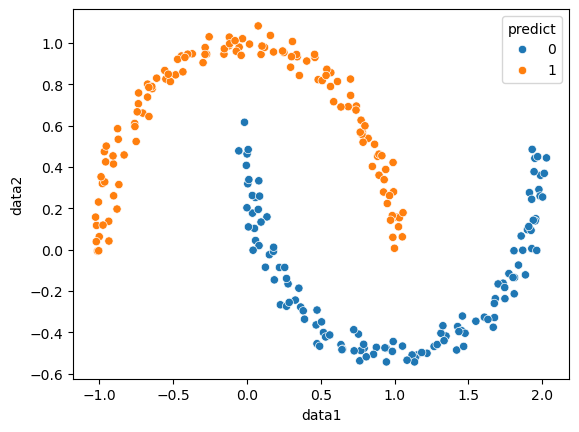

<Figure size 5000x3000 with 0 Axes>

In [308]:
sns.scatterplot(x="data1",y="data2",data=dataset,hue="predict")
plt.figure(figsize=(50,30))

plt.savefig("k-m.jpg", format='jpg',dpi=300)
plt.show()

In [315]:
from sklearn.metrics import silhouette_score
score = silhouette_score(dataset, dbs_can.labels_)
print("Silhouette Score:", score)

Silhouette Score: 0.450489199006328


<Figure size 5000x3000 with 0 Axes>

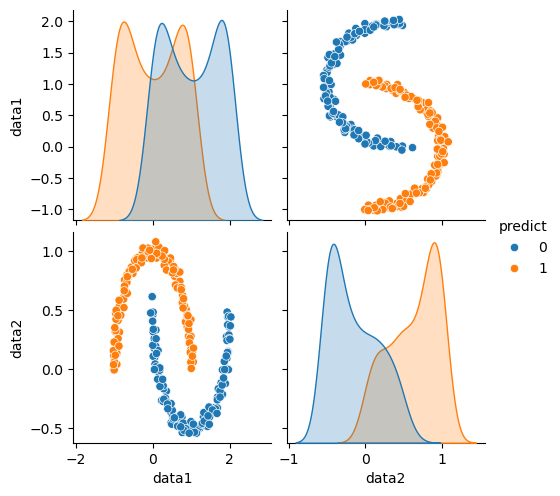

In [309]:
plt.figure(figsize=(50,30))
sns.pairplot(data=dataset,hue="predict")
plt.savefig("k-m1.jpg", format='jpg',dpi=300)
plt.show()

# Show for K-Mean

In [310]:
from sklearn.cluster import KMeans

In [311]:
kmn = KMeans(n_clusters=2)
kmn.fit_predict(dataset)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0])

In [312]:
dataset["data3"] = kmn.predict(dataset)
dataset["data3"]

0      0
1      1
2      1
3      0
4      0
      ..
245    0
246    0
247    0
248    1
249    0
Name: data3, Length: 250, dtype: int32

<Figure size 5000x3000 with 0 Axes>

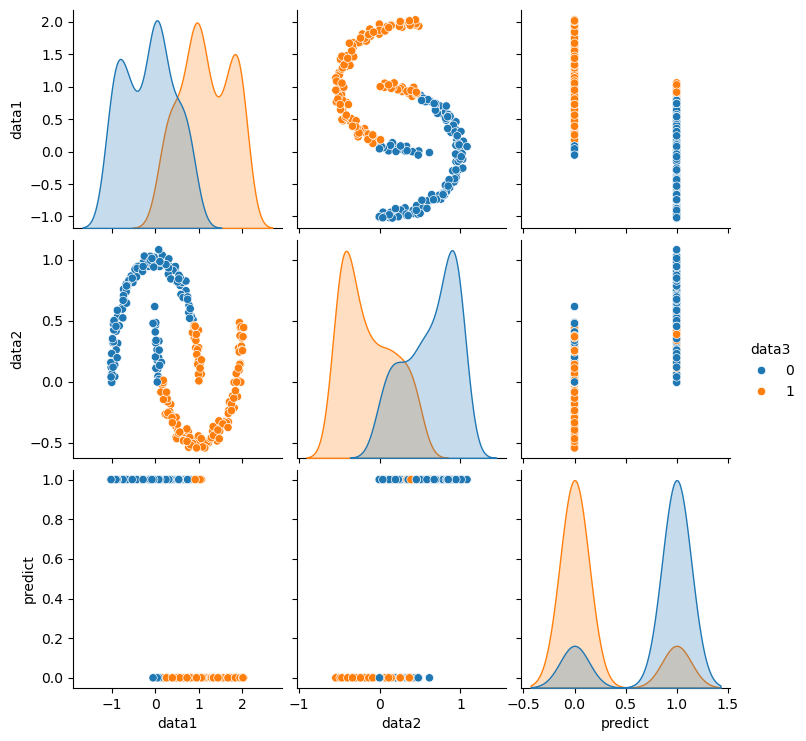

In [313]:
plt.figure(figsize=(50,30))
sns.pairplot(data=dataset,hue="data3")
plt.savefig("k-m.jpg", format='jpg',dpi=300)
plt.show()